# Data Science Salaries 2023 💸

### О датасете:

Data Science Job Salaries содержит 9 колонок:

- work_year: Год, когда была выплачена зарплата.

- experience_level: Уровень опыта работы на данной должности в течение года.

- employment_type: Тип занятости для данной роли.

- job_title: Название должности, на которой работал в течение года.

- salary: Общая сумма выплаченной зарплаты брутто.

- salary_currency: Валюта выплаченной зарплаты в виде кода валюты ISO 4217.

- salary_in_usd: зарплата в долларах США.

- employee_residence: Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.

- remote_ratio: Общий объем работы, выполняемой удаленно.

- company_location: Страна, в которой находится главный офис или филиал работодателя.

- company_size: Среднее количество человек, работавших в компании в течение года.

## 1. Загрузка данных и билиотек.

In [1]:
!pip install country_converter==1.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 KB 8.4 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install wordcloud==1.9.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.4/460.4 KB 19.5 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import country_converter as coco
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import nltk

%matplotlib inline

In [4]:
df = pd.read_csv('/work/ds_salaries.csv')
df.drop (df[['salary','salary_currency']], axis = 1, inplace = True)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [5]:
#проверка на нули
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
# проверка -- исключила две колонки, должно остаться 9
df.shape

(3755, 9)

Итак, я имею 9 колонок с 3755 строчками:

- три числовых : work_year, salary_in_usd, remote_ratio.

- шесть категориальных : experience_level, employment_type, job_title, employee_residense, company_location, company_size.

## 2. Анализ каждой переменной.

### Категориальные переменные.

### job_title -- должность

In [7]:
print('Different job designations altogether :', len(set(df['job_title'])))

Different job designations altogether : 93


Рассмотрю наиболее часто встречающиеся обозначения должностей:

In [8]:
top10_job_titles = df['job_title'].value_counts()[:10]
fig = px.bar(y = top10_job_titles.values, x = top10_job_titles.index, 
            text = top10_job_titles.values, title = 'Топ 10 должностей')
fig.update_layout(xaxis_title = "Должность", yaxis_title = "Количество")
fig.show()

Data Engineer & Data Scientist  занимают первые два места, за ними следуют Data Analyst и инженер машинного обучения.

Посмотри на облако слов обозначений должностей :

In [9]:
def Freq_df(word_list):
    Freq_dist_nltk = nltk.FreqDist(word_list)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient = 'index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by = ['Frequency'], ascending = False)
    df_freq = df_freq.reset_index()
    return df_freq

In [10]:
def Word_Cloud(data, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width = 1200, height = 600, max_words = 50,
               background_color = 'white',
               max_font_size = 100, random_state = 42)
    wc.generate_from_frequencies(data)
    
    plt.imshow(wc)
    plt.title(title)
    plt.axis('off')
    plt.show()

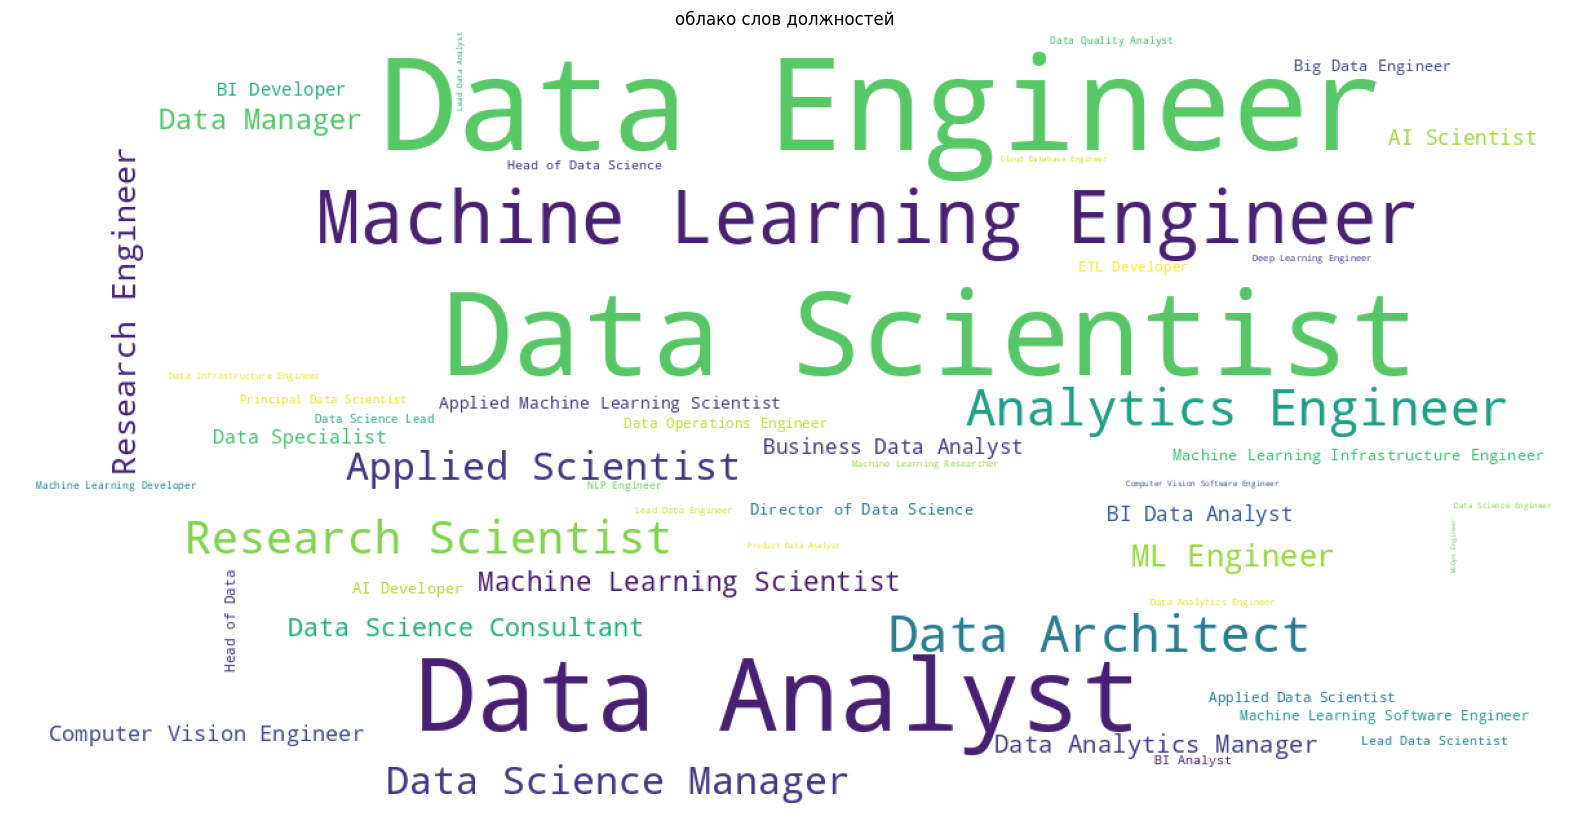

In [11]:
freq_df = Freq_df(df['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data , 'облако слов должностей')

### experience_level -- Уровень опыта

Здесь представлено четыре значения:

- EN, что означает -- Entry-level / Junior.

- MI, что означает -- Mid-level / Intermediate.

- SE, что означает -- Senior-level / Expert.

- EX - Executive-level / Director.

In [12]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

ex_level = df['experience_level'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values, 
                title = 'Уровень опыта')
fig.show()

Согласно данной карте видно, что больше всего в дотаяете представлено зарплаты специалистов сеньоров (2516 шт), далее средний уровень -- миди (805 шт). Меньше всего исполнительного уровня / директоров (114).

### employment_type -- тип занятости

Представлена четыре вида занятости:

- PT : Part-time (частичная занятость)

- FT : Full-time (полная)

- CT : Contract (по контракту)

- FL : Freelance (самозанятый)

In [13]:
group = df['employment_type'].value_counts()
emp_type = ['Полная занятость', 'Частичная', 'Контракт', 'Самозанятый']

fig = px.bar(x = emp_type, y = group.values, 
       color = group.index, text = group.values, 
       title = 'Распределение по типу занятости')

fig.update_layout( xaxis_title = "Тип занятости", yaxis_title = "Количество")
fig.show()

Больше всего представлены заплаты тех, кто на полной занятости. Меньше всего у тех, кто на контракте и самозанятый, всего 10 шт.

### company_size -- размер компании

In [14]:
group = df['company_size'].value_counts()

fig = px.bar(y = group.values, x = group.index, 
             color = group.index, text = group.values,
             title = 'Распределение по размеру компании')

fig.update_layout(xaxis_title = "Размер компании", yaxis_title = "Количество")
fig.show()

Больше всего средних компаний, а меньше всего небольших стартапов.

### Связь между местом жительства сотрудника и местонахождением компании

employee_residence -- страна проживания сотрудника

In [15]:
country = coco.convert(names = df['employee_residence'], to = "ISO3")
df['employee_residence'] = country

residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    title = 'Локация на карте')
fig.show()

Большинство сотрудников - из США.

In [16]:
top_10_emp_locations = residence[:10]
fig = px.bar(y = top_10_emp_locations.values, x = top_10_emp_locations.index, 
            color = top_10_emp_locations.index, text = top_10_emp_locations.values,
            title = 'Топ 10 должностей на карте')

fig.update_layout( xaxis_title = "Местонахождение", yaxis_title = "количество")
fig.show()

По количеству сотрудников лидируют США, затем GBR, CAN, ESP и IND.

Сравненю места жительства сотрудника и местонахождения компании:

In [17]:
country = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = country
company_location = df['company_location'].value_counts()
top_10_company_location = company_location[:10]

fig = go.Figure(data = [
    go.Bar(name = 'Проживание сотрудников', 
           x = top_10_emp_locations.index, y = top_10_emp_locations.values,
           text = top_10_emp_locations.values),
    go.Bar(name = 'Местонахождение компании', x = top_10_company_location.index, 
           y = top_10_company_location.values, text = top_10_company_location.values)])

fig.update_layout(barmode = 'group', xaxis_tickangle = -45,
                  title='Сравнение места жительства сотрудника и местонахождения компании')

fig.show()

В 2023 году в большинстве случаев страна проживания и страна работы совпадает. Но в представленном датасете 18 человек из Португалии, которые работают на самых популярных должностях не работают в местной компании (PRT -- 18). Ситуация иная в Австралии -- 14 компаний из AUS не имеют работников из своей страны. 

### Числовые переменные

### work_year -- Год, когда была выплачена зарплата

In [18]:
work_year = df['work_year'].value_counts()
fig = px.pie(values = work_year.values, names = work_year.index, 
            title = 'Распределение года')
fig.show()

Данные за 2023 год составляют около 47,5% в наборе данных, за ними следуют данные за 2022 год. Это может свидетельствовать о колоссальном росте в этой области или о смещении данных вследствие того, что в данный дотаяет были подгружены не все необходимые данные. Но представлю, что эти данные были собраны правильно, и исходя из этого буду делаьб дальнейшие выводы.

### remote_ratio -- объем работы на удаленке

Здесь представлено три значения:

- 0 : Отсутствие удаленной работы (менее 20%)

- 50 : Частично удаленная

- 100 : Полностью удаленная работа (более 80%)

In [19]:
remote_type = ['Удаленка', 'Частично удаленка', 'В офисе']

fig = px.bar(x = remote_type, y = df['remote_ratio'].value_counts().values,
       color = remote_type, text = df['remote_ratio'].value_counts().values,
       title = 'Распределения объема удаленной работы')

fig.update_layout( xaxis_title = "Тип", yaxis_title = "Количество")
fig.show()

По состоянию на 2023 год большинство компаний по-прежнему используют полностью удаленную работу, за ней последует частично удаленная, а затем "в офисе".

### salary_in_usd -- зарплата в долларах

In [20]:
fig = px.box(y = df['salary_in_usd'], title = 'ЗП в USD')
fig.show()

Согласно данному графику медиана зарплаты -- 135к. 25% наблюдений имеют зарплату ниже 95к долларов и 25% наблюдений имеют заплату выше 175к долларов. Существуют и выбросы, которые лежат за пределами усов и меньший выброс равен 297.3к, а больший выброс равен 450к долларов.

## 3. Анализ по годам

Интересно, меняется ли соотношение удаленной работы с течением времени?

### Удаленная работа по годам

In [21]:
remote_year = df.groupby(['work_year','remote_ratio']).size()
ratio_2020 = np.round(remote_year[2020].values/remote_year[2020].values.sum(),2)
ratio_2021 = np.round(remote_year[2021].values/remote_year[2021].values.sum(),2)
ratio_2022 = np.round(remote_year[2022].values/remote_year[2022].values.sum(),2)
ratio_2023 = np.round(remote_year[2023].values/remote_year[2023].values.sum(),2)

fig = go.Figure()
categories = ['в офисе', 'частично удаленка', 'удаленка']
fig.add_trace(go.Scatterpolar(
            r = ratio_2020, theta = categories, 
            fill = 'toself', name = '2020'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2021, theta = categories,
            fill = 'toself', name = '2021'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2022, theta = categories,
            fill = 'toself', name = '2022'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2023, theta = categories,
            fill = 'toself', name = '2023'))

fig.show()

Согласно данному графику больше всего удаленной работы приходится на 2021 год -- это и полная удаленка и частичная удаленка. В 2020 году также большое количество удалении, но все же работа "в офисе" представлена больше. Ситуация начинает меняться в 2022 году, вероятно это связано с пандемией. В 2022 году было наибольшое количество удаленной работы, но уже намного меньше частичной удаленки -- вероятнее всего компании перестали давать частично удаленную работу и стали переводить сотрудников обратно в офис. В 2023 года количество удаленной работы резко сократилось, но частично удаленной практически не изменилось по сравнению с 2022 годом. Работа в офисе же увеличилась в разы.

## 4. Анализ по уроню опыта

А как зависит тип занятости и уровень опыта между собой?

In [22]:
exp_type = df.groupby(['experience_level','employment_type']).size()

fig = go.Figure(data = [
    go.Bar(name = 'Entry-level/Junior', x = exp_type['Entry-level/Junior'].index, 
           y = exp_type['Entry-level/Junior'].values, text = exp_type['Entry-level/Junior'].values),
    go.Bar(name = 'Executive-level/Director', x = exp_type['Executive-level/Director'].index, 
           y = exp_type['Executive-level/Director'].values, text = exp_type['Executive-level/Director'].values),
    go.Bar(name = 'Mid-level/Intermediate', x = exp_type['Mid-level/Intermediate'].index,
           y = exp_type['Mid-level/Intermediate'].values, text = exp_type['Mid-level/Intermediate'].values),
    go.Bar(name = 'Senior-level/Expert', x = exp_type['Senior-level/Expert'].index,
           y = exp_type['Senior-level/Expert'].values, text = exp_type['Senior-level/Expert'].values)])

fig.update_layout(xaxis_tickangle = -45, title = 'Уровень опыта и тип занятости')

fig.show()

При работе на полном рабочем дне больше всего специалистов с высоким уровнем опыта -- сеньоров. Далее миддлов, затем джунов и меньше всего исполнительных сотрудников-директоров. Вероятно маленькое количество людей на последней описанной мной должности (директоров) связано с тем, что в целом директоров не может быть больше, чем любых других сотрудников в целом. Поскольку например в одтеле разработчиков содержится 10 человек и 9 из них разработчики, а один на руководящей должности. Поэтому в целом распределение логиное.

### Топ-3 профессии, основанных на опыте

In [23]:
exp_job = df.groupby(['experience_level','job_title']).size()

entry_top3 = exp_job['Entry-level/Junior'].sort_values(ascending = False)[:3]
executive_top3 = exp_job['Executive-level/Director'].sort_values(ascending = False)[:3]
mid_top3 = exp_job['Mid-level/Intermediate'].sort_values(ascending = False)[:3]
senior_top3 = exp_job['Senior-level/Expert'].sort_values(ascending = False)[:3]

exp_type = df.groupby(['experience_level','employment_type']).size()

fig = go.Figure(data=[
    go.Bar(name = 'Entry-level/Junior', x = entry_top3.index, 
           y=entry_top3.values, text = entry_top3.values),
    go.Bar(name = 'Executive-level/Director', x = executive_top3.index,
           y = executive_top3.values, text = executive_top3.values),
    go.Bar(name = 'Mid-level/Intermediate', x = mid_top3.index,
           y = mid_top3.values, text = mid_top3.values ),
    go.Bar(name = 'Senior-level/Expert', x = senior_top3.index,
           y = senior_top3.values, text = senior_top3.values)])

fig.update_layout(xaxis_tickangle = -45, title = 'Уровень опыта по 3 профессиям')
fig.show()

- В Analytics Engineer работают только опытные люди старшего возраста.

- На начальном уровне, как правило, примерно одинаково занимаются  data engineer, data scientist и data analyst.

- Средний уровень/Intermediate, как правило, имеет позицию data sceintist и data engineer, а не аналитика.

- Очевидно, что на исполнительном уровне/директоре нет должности data analyst, но, как правило, есть должность analytics engineer, data scientist и data engineer.

- analytics engineer состоит только из позиций высшего звена -- Executive-level/Director.

### Размер компании на основе опыта

In [24]:
exp_size = df.groupby(['experience_level','company_size']).size()
fig = go.Figure(data = [
    go.Bar(name = 'Entry-level/Junior', x = exp_size['Entry-level/Junior'].index,
           y = exp_size['Entry-level/Junior'].values, text = exp_size['Entry-level/Junior'].values),
    go.Bar(name = 'Executive-level/Director', x = exp_size['Executive-level/Director'].index,
           y = exp_size['Executive-level/Director'].values, text = exp_size['Executive-level/Director'].values),
    go.Bar(name = 'Mid-level/Intermediate', x = exp_size['Mid-level/Intermediate'].index,
           y = exp_size['Mid-level/Intermediate'].values, text = exp_size['Mid-level/Intermediate'].values),
    go.Bar(name = 'Senior-level/Expert', x = exp_size['Senior-level/Expert'].index,
           y = exp_size['Senior-level/Expert'].values, text = exp_size['Senior-level/Expert'].values),
])
fig.update_layout(xaxis_tickangle = -45, title = 'Experience Level with Company Size')

fig.show()

Выводы:

- В крупных компаниях наименьшее количество наблюдейний, поскольку как уже выяснялось таких компаний мало. Больше всего сотрудников уровня "сеньор", поменьше уровня "миддл" и затем уровня "джун". Очень мало руководителей, но это связано с выборкой.

- В компаниях среднего размера в основном старшее звено, затем среднее и начальное. Руководители немного выделяются по сравнению с крупными компаниями.

- В малых компаниях / стартапах мы видим, что все три уровня, кроме руководителей, пропорциональны.

## 5. Анализ местоположения компании

### Расположение компании в зависимости от опыта

In [25]:
exp_loc = df.groupby(['experience_level','company_location']).size()

entry_loc = exp_loc['Entry-level/Junior']
executive_loc = exp_loc['Executive-level/Director']
mid_loc = exp_loc['Mid-level/Intermediate']
senior_loc = exp_loc['Senior-level/Expert']

fig1 = px.choropleth(locations = entry_loc.index, color = entry_loc.values,
                    title = 'Начальный/джун Местонахождение компании')

fig2 = px.choropleth(locations = mid_loc.index, color = mid_loc.values,
                    title = 'Средний/миддл Местонахождение компании')

fig3 = px.choropleth(locations = senior_loc.index, color = senior_loc.values,
                    title = 'Старший уровень/сеньор Местонахождение компании')

fig4 = px.choropleth(locations = executive_loc.index, color = executive_loc.values,
                    title = 'Исполнительный уровень/директор Местонахождение компании')

fig1.add_scattergeo(locations = entry_loc.index, text = entry_loc.values,  mode = 'text')
fig2.add_scattergeo(locations = mid_loc.index, text = mid_loc.values,  mode = 'text')
fig3.add_scattergeo(locations = senior_loc.index, text = senior_loc.values, mode = 'text')
fig4.add_scattergeo(locations = executive_loc.index, text = executive_loc.values,  mode = 'text')

fig1.show()
fig2.show()
fig3.show()
fig4.show()

Можно наблюдать серьезное смещение данных -- это первое. Данные в основном представлены для США. Данные по РФ, Индии, Канаде, Южной Америке и Европе представлены в очень небольшом количестве. Согласно этим данным очень небольшое количество компаний в РФ, что не соответствует действительности.

## 6. Анализ ЗП

### ЗП в зависимости от года

In [27]:
work2020 = df.loc[(df['work_year'] == 2020)]
work2021 = df.loc[(df['work_year'] == 2021)]
work2022 = df.loc[(df['work_year'] == 2022)]
work2023 = df.loc[(df['work_year'] == 2023)]
 
hist_data = [work2020['salary_in_usd'], work2021['salary_in_usd'], 
            work2022['salary_in_usd'], work2023['salary_in_usd']]
group_labels = ['2020 зп', '2021 зп', '2022 зп', '2023 зп']

year_salary = pd.DataFrame(columns = ['2020', '2021', '2022', '2023'])
year_salary['2020'] = work2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = work2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = work2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2023'] = work2023.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = year_salary.columns, 
                            y = year_salary.values.tolist()[0],
                            color = year_salary.columns,
                            title = 'Средняя зарплата по годам'))

fig1.update_layout(title = 'Распределение ЗП в зависимости от года работы')
fig2.update_layout(xaxis_title = "Год работы", yaxis_title = "Средняя зарплата (тыс.= к)")
fig1.show()
fig2.show()

Первое, что очень очевидно -- это то, что уровни ЗП в 2021 и 2020 годах примерно одинаковые. В 2023 и 2022 годах уровень заработной платы выше, чем в 2021 и 2020 годах. С 2021 по 2022 год произошел резкий скачок ЗП, также 2023 году по сравнению с 2022 выросла ЗП, но не так резко. Это может свидетельствовать и о том, что сфера стала престижнее, и о том, что она развивается и появляется конкуренция между компаниями за кадры, но также это может свидетельствовать и об инфляции.

### ЗП в зависимости от опыта

In [29]:
exp_salary = df[['experience_level','salary_in_usd']]

entry_salary = exp_salary.loc[exp_salary['experience_level'] == 'Entry-level/Junior']
executive_salary = exp_salary.loc[exp_salary['experience_level'] == 'Executive-level/Director']
mid_salary = exp_salary.loc[exp_salary['experience_level'] == 'Mid-level/Intermediate']
senior_salary = exp_salary.loc[exp_salary['experience_level'] == 'Senior-level/Expert']

hist_data = [entry_salary['salary_in_usd'], mid_salary['salary_in_usd'], senior_salary['salary_in_usd'], executive_salary['salary_in_usd']]
group_labels = ['Entry-level/Junior', 'Mid-level/Intermediate', 'Senior-level/Expert', 'Executive-level/Director']

means = [entry_salary['salary_in_usd'].mean(), mid_salary['salary_in_usd'].mean(),
    senior_salary['salary_in_usd'].mean(), executive_salary['salary_in_usd'].mean(),]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = group_labels, y = means, color = group_labels,
                            title = 'Средняя ЗП в зависимости от опыта'))
                            
fig1.update_layout(title = 'Распределение заработной платы в зависимости от опыта')
fig2.update_layout(xaxis_title = "Опыт", yaxis_title = "Средняя зарплата (тыс.= к)")
fig1.show()
fig2.show()

Очевидно, что начальный уровень имеет более низкий уровень ЗП. Интересен тот факт, что разница между начальным и средним уровнем не такая большая, как между средним (миддл) и высоким (сеньор). По графику распределения ЗП можно отметить тот факт, что наиболее плотное распределение у сотрудников с высоким уровнем опыта (сеньор). У сотрудников - джунов распределение менее плотное, также наблюдаются выбросы. Нет четкого распределения между уровнем опыта и зп. То есть люди могут на уровне Джуна могут зарабатывать также как и люди на позиции директора. Вероятнее всего это зависит от размера компании, местоположения компании. 

### ЗП в зависимости от размера компании

In [30]:
company_size = df[['company_size','salary_in_usd']]
small = exp_salary.loc[company_size['company_size'] == 'S']
mid = exp_salary.loc[company_size['company_size'] == 'M']
large = exp_salary.loc[company_size['company_size'] == 'L']
hist_data = [small['salary_in_usd'], mid['salary_in_usd'], large['salary_in_usd']]
group_labels = ['Маленькая компани', 'Средняя компания', 'Крупная компания']

means = [small['salary_in_usd'].mean(), mid['salary_in_usd'].mean(), large['salary_in_usd'].mean()]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data = px.bar(x = group_labels, y = means, color = group_labels,
                title = 'Средняя ЗП по размеру компании'))

fig1.update_layout(title = 'Распределение ЗП в зависимости от размера компании')
fig2.update_layout( xaxis_title = "Размер компании", yaxis_title = "Средняя запрплата (тыс=к)")
fig1.show()
fig2.show()

Средняя ЗП наибольше в средних компаниях, чуть меньше средняя ЗП по крупным компаниям и самая маленькая средняя ЗП по компаниям-стартапа. Таким образом, можно сделать вывод, что крупные компании не обязательно имеют более высокие зарплаты, чем средние.

### Высокие зарплаты в зависимости от должности

In [32]:
salary_designation = df.groupby(['salary_in_usd', 'job_title']).size().reset_index()
salary_designation = salary_designation[-25:]
fig = px.bar(x = salary_designation['job_title'], y = salary_designation['salary_in_usd'],
            text = salary_designation['salary_in_usd'], color = salary_designation['salary_in_usd'])

fig.update_layout( xaxis_title = "Должность", yaxis_title = "ЗП")
fig.update_layout(xaxis_tickangle = -45, 
                  title = 'Tоп 20 должностей по размеру высоких ЗП')

Наибольшим показателем ЗП обладает должность Research Scientist, затем Data Scientict и Data Analyst.

### Средняя ЗП в зависимости от местонахождения компании

In [33]:
salary_location = df.groupby(['salary_in_usd', 'company_location']).size().reset_index()
means = salary_location.groupby('company_location').mean().reset_index()

fig = px.choropleth(locations = means['company_location'], color = means['salary_in_usd'],
                    title = 'Средняя зп от местополжения компании')
fig.show()

Можно заметить, что более высокие средние зарплаты имеют более яркие цвета, в то время как более низкие средние зарплаты имеют более темные цвета. Соответственно наиболее высокие ЗП в США и России, затем в Канаде, Мексике, Швеции, Германии, Китае и так далее. Однако, в процессе анализа я выявила, что данные смещены, поэтому полагаться на выводы о среднем уровне ЗП и распределении по странам полностью не стоит.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ea66a1b-289b-4232-8a8c-4d942c37eab4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>